/var/folders/4j/_0lfq3x15838n8qb30n43sdc0000gn/T/ipykernel_47573/1346443554.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plya[i,j] = templya.LyaLya_base_Mpc_norm(4.0, kbin[j], mu_lya) + templya.LyaLya_reio_Mpc_norm(4.0, kbin[j], mu_lya) # Equation (6), in Mpc^3


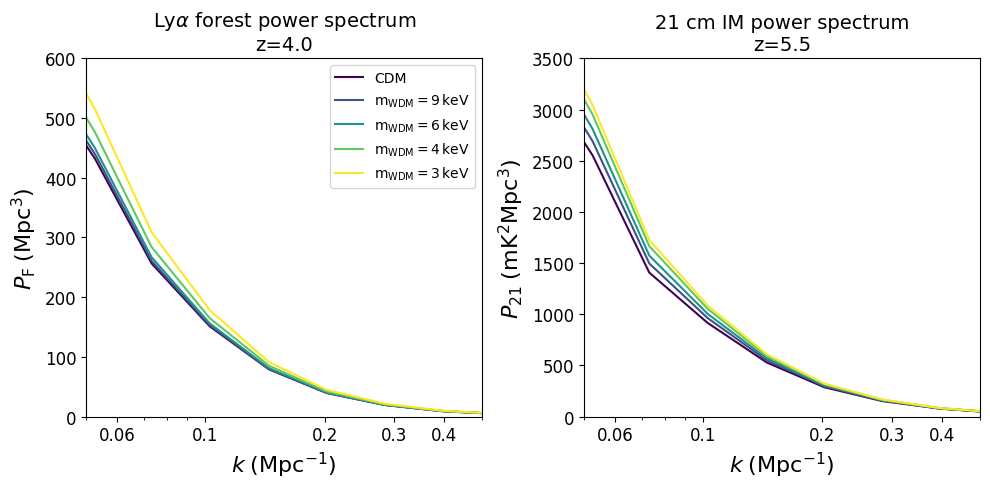

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# general dictionary
params={}
params['h'] = 0.6774
params['Obh2'] = 0.02230
params['Och2'] = 0.1188
params['ns'] = 0.9667
params['mnu'] = 0.194
params['alphas'] = -0.002
params['taure'] = 0.066
params['bHI'] = 2.82
params['OHI'] = 1.18e-3 * 1.e3
params['fast-realization'] = 'ave'
params['gadget-realization'] = 'ave'
params['band'] = 'g'
params['telescope'] = 'puma'
params['beam'] = 32 # bandwidth in MHz
params['z_max_pk'] = 5.5
params['P_k_max_1/Mpc'] = 10
params['pickle'] = False # only farmer would have True here
params['sigma8'] = 0.8159
params['t_int'] = 1000.
params['m_wdm'] = np.inf
params['fast-model'] = 'cdm_s8'
params['gadget-model'] = 'cdm_s8'

'''
    calculate the Lya forest power spectrum with mu = 0.1 at z = 4, and 21 cm IM power spectrum with mu=0.9 at z=5.5,
    with the imprint of reionization (the first row in Figure 2)
'''

import theory_P_21cm as theory_21
import theory_P_lyas_arinyo as theory_lya
import patchy_reion_21 as patchy

models = ['cdm_s8', '9keV_s8', '6keV_s8', '4keV_s8', '3keV_s8']
mwdm = [np.inf, 9.0, 6.0, 4.0, 3.0]
kbin = np.loadtxt('../data/21cmFAST/cross_21cm_ave_cdm_s8.txt', usecols=(1), unpack=True)
kbin = np.unique(kbin)
kbin = kbin[2:-2]
knum = len(kbin)
mu_lya = 0.1
mu_21 = 0.9
plya = np.zeros((5,knum))
p21 = np.zeros((5,knum))
patchy_class = patchy.P_21_obs(params)
for i in range(5):
    params['m_wdm'] = mwdm[i]
    params['fast-model'] = models[i]
    params['gadget-model'] = models[i]
    templya = theory_lya.theory_P_lyas(params)
    temp21 = theory_21.theory_P_21(params)
    for j in range(knum):
        plya[i,j] = templya.LyaLya_base_Mpc_norm(4.0, kbin[j], mu_lya) + templya.LyaLya_reio_Mpc_norm(4.0, kbin[j], mu_lya) # Equation (6), in Mpc^3
        p21[i,j] = temp21.P3D_21_Mpc_norm(5.5, kbin[j], mu_21) # Equation (15), in Mpc^3
    p21[i] = p21[i] * patchy_class.Tb_mean(5.5)**2 # in mK^2 Mpc^3


lw = 1.5
labels = ['CDM', r'${\rm m_{WDM}=9\,keV}$',r'${\rm m_{WDM}=6\,keV}$', r'${\rm m_{WDM}=4\,keV}$', r'${\rm m_{WDM}=3\,keV}$']
colors = plt.cm.viridis(np.linspace(0,1,5))

fig, axs = plt.subplots(1,2,figsize=(10,5),sharex=True)

for i in range(5):
    axs[0].plot(kbin, plya[i], c=colors[i], label=labels[i], linewidth=lw)
    axs[1].plot(kbin, p21[i], c=colors[i], label=labels[i], linewidth=lw)

axs[0].set_xscale('log')
axs[0].set_xlim(0.05, 0.5)
axs[0].set_xticks([0.06, 0.1, 0.2, 0.3, 0.4])
axs[0].get_xaxis().set_major_formatter(matplotlib.ticker.FixedFormatter(['0.06','0.1','0.2','0.3','0.4']))
axs[0].tick_params(labelsize = 12)
axs[0].set_xlabel(r'$k\;{\rm (Mpc^{-1})}$', fontsize=16)
axs[1].set_xlabel(r'$k\;{\rm (Mpc^{-1})}$', fontsize=16)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 12)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 12)
axs[0].set_ylabel(r'$P_{\rm F}\;{\rm (Mpc^3)}$', fontsize=16)
axs[1].set_ylabel(r'$P_{21}\;{\rm (mK^2Mpc^3)}$', fontsize=16)
axs[0].set_title(r'${\rm Ly}\alpha$'+' forest power spectrum\nz=4.0', fontsize=14)
axs[1].set_title('21 cm IM power spectrum\nz=5.5', fontsize=14)
axs[1].set_ylim(0,3500)
axs[0].set_ylim(0,600)
axs[0].legend()
fig.tight_layout()
plt.show()

/var/folders/4j/_0lfq3x15838n8qb30n43sdc0000gn/T/ipykernel_47573/1908736763.py:16: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  psi[i,j] = temp(z_res[j],z_obs)
/var/folders/4j/_0lfq3x15838n8qb30n43sdc0000gn/T/ipykernel_47573/1908736763.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  psi[i,j] = temp(z_res[j],z_obs)


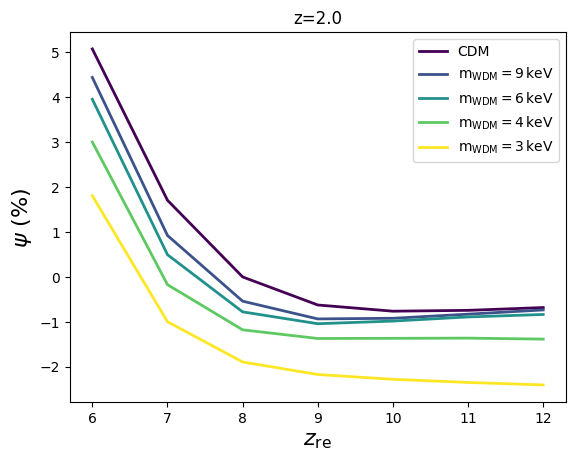

In [2]:
'''
    read psi pickles
    plot relative transparency of a patch of gas locally reionized at z_re compared to gas reionized at z=8 in CDM model
    (the first panel in Fig. A1)
'''
import pickle

z_obs = 2.
z_res = [6., 7., 8., 9., 10., 11., 12.]
psi = np.zeros((5,7))
for i in range(5):
    file = open('../pickles/psi_ave_%s.pkl'%models[i], 'rb')
    temp = pickle.load(file)
    file.close()
    for j in range(7):
        psi[i,j] = temp(z_res[j],z_obs)

psi *= 100.  # convert to %

for i in range(5):
    plt.plot(z_res,psi[i], c=colors[i], label=labels[i], linewidth=2)

plt.xlabel(r'$z_{\rm re}$', fontsize=16)
plt.ylabel(r'$\psi\ (\%)$ ', fontsize=16)
plt.title('z=2.0')
plt.legend()
plt.show()

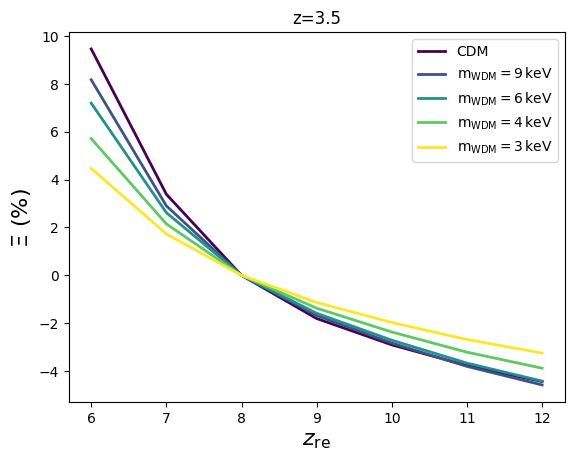

In [3]:
'''
    read rho_HI pickles
    plot relative HI density in a region that locally reionized at z_re compared to that reionized at z=8.
    (the first panel in Fig. A5)

'''

z_obs = 3.5
z_res = [6., 7., 8., 9., 10., 11., 12.]
rhoHI = np.zeros((5,7))
for i in range(5):
    file = open('../pickles/rho_HI_func_ave_%s.pkl'%models[i], 'rb')
    temp = pickle.load(file)
    file.close()
    for j in range(7):
        rhoHI[i,j] = temp(z_res[j],z_obs)
    rhoHI[i] = np.log(rhoHI[i]/rhoHI[i,2])
    
rhoHI *= 100.  # convert to %

for i in range(5):
    plt.plot(z_res,rhoHI[i], c=colors[i], label=labels[i], linewidth=2)

plt.xlabel(r'$z_{\rm re}$', fontsize=16)
plt.ylabel(r'$\Xi\ (\%)$ ', fontsize=16)
plt.title('z=3.5')
plt.legend()
plt.show()

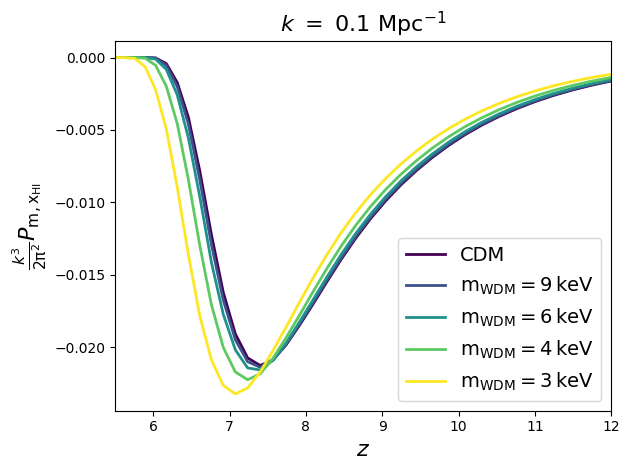

In [4]:
'''
    read pat pickles
    plot the cross-power spectrum of matter and xHI as a function of redshift and evaluated at k = 0.1 Mpc^-1
    Fig. A8
'''

zbin = np.loadtxt('../data/21cmFAST/cross_21cm_ave_cdm_s8.txt', usecols=(0), unpack=True)
zbin = np.unique(zbin)
znum = len(zbin)
cross = np.zeros((5,znum))
for i in range(5):
    file = open('../pickles/pat_ave_%s.pkl'%models[i], 'rb')
    temp = pickle.load(file)
    file.close()
    for j in range(znum):
        cross[i,j] = temp(zbin[j],0.1) * 0.1**3 / (2*np.pi**2) # dimensionless power spectrum

for i in range(5):
    plt.plot(zbin, cross[i], c=colors[i], label=labels[i], linewidth=2)
plt.title(r'$k\ =\ 0.1\ {\rm Mpc^{-1}}$',fontsize=16)
plt.xlabel(r'$z$', fontsize=16)
plt.ylabel(r'$\frac{k^3}{\rm 2\pi^2} {\it P}_{\rm m, x_{HI}}$', fontsize=16)
plt.legend(loc='lower right',fontsize=14)
plt.xlim((5.5, 12))
plt.tight_layout()
plt.show()

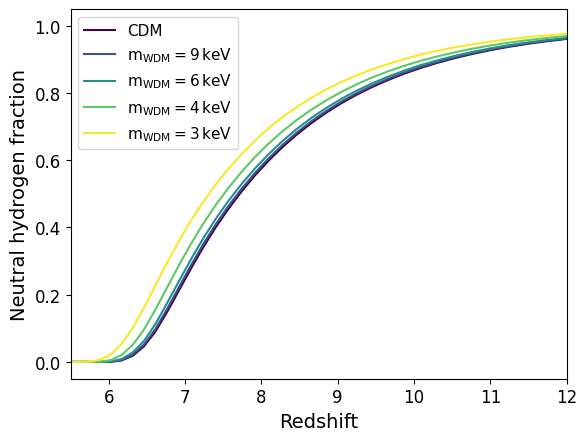

In [6]:
'''
    plot the evolution of volume-weighted global neutral hydrogen fraction
    Fig. A4
'''

zbin = np.loadtxt('../data/21cmFAST/xH_21cm_ave_cdm_s8.txt', usecols=(0), unpack=True)
znum = len(zbin)
xHI = np.zeros((5,znum))
for i in range(5):
    xHI[i] = np.loadtxt('../data/21cmFAST/xH_21cm_ave_%s.txt'% models[i], usecols=(1), unpack=True)
for i in range(5):
    plt.plot(zbin, xHI[i], c=colors[i], label=labels[i], linewidth=1.5)

plt.xlim(5.5,12)
plt.xlabel(r'Redshift',fontsize=14)
plt.ylabel(r'Neutral hydrogen fraction',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=11)
plt.show()